In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import cv2

In [2]:
img = cv2.imread('./fig/fig/cow.png')

if img is None : 
    print('img read failed')
    sys.exit()

    # resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
img_re = cv2.resize(img,(300, 200), interpolation = cv2.INTER_LINEAR) # interpolation 이 디폴트값이라 안써도는 됨
    # cv2.INTER_AREA = 선이 얇을때 사용
cv2.namedWindow('img', cv2.WINDOW_AUTOSIZE)
cv2.imshow('img', img)

while True :
    key = cv2.waitKey()
    if key == 27 or key == ord('q') :
        break
        
cv2.destroyAllWindows()

In [3]:
import os 

In [7]:
img_list = os.listdir('./fig/images/')
img_files = []
for i in img_list :
    img_path = './fig/images/' + i
    img_files.append(img_path)
    
cv2.namedWindow('img', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('img', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

idx = 0

while True :
    img = cv2.imread(img_files[idx])
    
    if img is None : 
        print('img read failed')
        break
        
    cv2.imshow('img', img)
    
    if cv2.waitKey(3000) == 27:
        break
        
    idx += 1 
    
    if idx >= len(img_files) :
        idx = 0
        
cv2.destroyAllWindows()

In [ ]:
img1 = np.zeros((400, 600, 5), np.uint8)
img2 = np.ones((400,600,3), np.uint8) * 255
img3 = np.full((400,600,3), (255,0,255), np.uint8)

In [8]:
src = cv2.imread('./fig/fig/airplane.bmp')
mask = cv2.imread('./fig/fig/mask_plane.bmp', 0)
dst = cv2.imread('./fig/fig/field.bmp')


cv2.copyTo(src, mask, dst)
cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
sunglass = cv2.imread('./fig/fig/imgbin_sunglasses_1.png', cv2.IMREAD_UNCHANGED)
# print(sunglass.shape) # 뒤에 알파채널이 하나 더 붙어있어서 때는 작업을 진행

mask = sunglass[:,:,-1]
src = sunglass[:,:, 0:-1]

cv2.imshow('mask', mask)
cv2.imshow('src',src)

cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
img = np.ones((600, 1200, 3), np.uint8) * 255

cv2.line(img, (50,50), (200, 50), (0,0,255), 5, cv2.LINE_AA) # 처음 시작점의 위치, 끝나는 점의 위치, 색, 라인굵기

cv2.rectangle('img',(50,70), (200, 100), (255,0,0), -1)
# cv2.rectangle('img',(50,70,150, 30), (255,0,0), -1)
cv2.circle('img', (200,400, 100, (0,255,0), 10, cv2.LINE_AA)


cv2.imshow('img', img)
           
Text = 'test'
cv2.putText(img, Text, (200,600), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)

cv2.waitKey()
cv2.destroyAllWindows()

SyntaxError: invalid syntax (3921184437.py, line 10)

In [2]:
cap = cv2.VideoCapture(0)

if not cap.isOpened() : 
    print('video open failed')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))   
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) 
fps = int(cap.get(cv2.CAP_PROP_FPS)) 
fourcc = cv2.VideoWriter_fourcc(*'DIVX') 
    
    
    
    
while True :
    ret, frame = cap.read()
    
    if not ret : 
        print('frame read failed')
        break
        
    edge = cv2.Canny(frame, 50, 150)
    flip = cv2.flip(frame, 1)
    
    
    cv2.imshow('edge', edge)
    cv2.imshow('flip', flip)
    
    if cv2.waitKey(30) == 27 :
        break
        
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('./fig/fig/puppy.bmp')



In [3]:
## 마우스로 그리는 손글씨
def call_mouse(event, x, y, flags, param) : 
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE :
        if flags == cv2.EVENT_FLAG_LBUTTON : 
            cv2.line(img, (oldx, oldy), (x,y), (0,0,255), 10, cv2.LINE_AA)
            cv2.imshow('img', img)
            oldx, oldy = x,y
            
img = np.ones((600, 1200), np.uint8)*255

cv2.imshow('img', img)
cv2.setMouseCallback('img', call_mouse, img)

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
img = cv2.imread('./fig/fig/puppy.bmp',0)

def call_track(pos) :
    img[:] = np.round(img1*(pos/255),0).astype(np.uint8)
    cv2.imshow('img', img)
    
img1 = img.copy()
    
cv2.imshow('img', img)
cv2.createTrackbar('level', 'img', 0, 255, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
img = cv2.imread('./fig/fig/flowers.jpg')

b,g,r = cv2.split(img)

cv2.imshow('img', img)
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)

cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
img=cv2.imread('./fig/lenna.bmp',1)
# calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist

hist_b=cv2.calcHist([img],[0],None,[256],[0,256])
hist_g=cv2.calcHist([img],[1],None,[256],[0,256])
hist_r=cv2.calcHist([img],[2],None,[256],[0,256])

plt.plot(hist_b,color='b')
plt.plot(hist_g,color='g')
plt.plot(hist_r,color='r')
plt.show()
cv2.namedWindow('image')
cv2.imshow('image',img)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:160: error: (-215:Assertion failed) j < nimages in function 'cv::histPrepareImages'


100.0 184.0


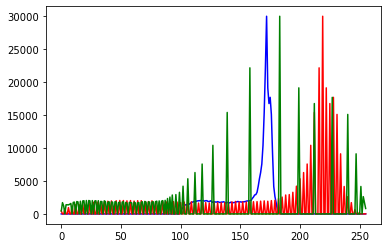

In [8]:
src  = cv2.imread('./fig/fig/puppy_shrink.png', 0)

# minMaxLoc(src[, mask]) -> minVal, maxVal, minLoc, maxLoc
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)
print(minVal, maxVal)

dst_norm = np.clip((src -minVal)*255./(maxVal-minVal), 0, 255).astype(np.uint8)

# normalize(src, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]) -> dst
dst_norm = cv2.normalize(src, None,0, 255, cv2.NORM_MINMAX, -1)
# equalizeHist(src[, dst]) -> dst
dst_equal = cv2.equalizeHist(src)

# calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
hist = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_norm = cv2.calcHist([dst_norm], [0], None, [256], [0, 256])
hist_equal = cv2.calcHist([dst_equal], [0], None, [256], [0, 256])

# 기본 이미지는 한쪽으로 쏠려있어서 평탄화 작업 해야함
cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)

plt.plot(hist, color = 'b')
plt.plot(hist_norm, color = 'r')
plt.plot(hist_equal, color = 'g')
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread('./fig/fig/spring_in_park.jpg', cv2.IMREAD_REDUCED_COLOR_2)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(src_hsv)

v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)
v_equal = cv2.equalizeHist(v)

dst_norm = cv2.merge((h,s,v_norm))
dst_equal = 

In [14]:
def call_track(pos) :
    hmin = cv2.getTrackbarPos('h_min', 'dst')
    hmax = cv2.getTrackbarPos('h_max', 'dst')
    smin = cv2.getTrackbarPos('s_min', 'dst')
    
    dst = cv2.inRange(src_hsv, (h_min, s_min, 150, 0), (h_max, 255,255))
    dst = cv2.copyTo(src, dst)
    cv2.imshow('dst', dst)

src = cv2.imread('./fig/fig/palette.png')

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# inRange(src, lowerb, upperb[, dst]) -> dst
dst_blue = cv2.inRange(src_hsv ,(110, 0, 0),(130, 255,255)) # 파란색 뽑기/구글에 hsv 검색

cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('h_min', 'dst', 0, 255, call_track)
cv2.createTrackbar('h_max', 'dst', 100, 255, call_track)
cv2.createTrackbar('s_min', 'dst', 0, 255, call_track)
# cv2.imshow('dst_b', dst_blue)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

NameError: name 'h_min' is not defined

In [17]:
def call_track(pos) : 
    hmin = cv2.getTrackbarPos('hmin', 'mask')
    hmax = cv2.getTrackbarPos('hmax', 'mask')
    smin = cv2.getTrackbarPos('smin', 'mask')
    
    dst_mask = cv2.inRange(dst_hsv, (hmin, smin,0), (hmax,255,255))
    
    dst1 = dst.copy()
    
    cv2.copyTo(src, dst_mask, dst1)
    cv2.imshow('dst', dst1)
    cv2.imshow('mask', mask)



src = cv2.imread('./fig/fig/autumn.jpg')
dst = cv2.imread('./fig/fig/chromakey.png')

h,w = dst.shape[:2]
src = cv2.resize(src, (w,h)) # src와 dst를 동일한 크기로 바꿈
dst_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.namedWindow('mask')
cv2.createTrackbar('h_min', 'mask', 50, 255, call_track)
cv2.createTrackbar('h_max', 'mask', 100, 255, call_track)
cv2.createTrackbar('s_min', 'mask', 0, 255, call_track)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
